## Collect Twitter Data
- https://www.freecodecamp.org/news/python-web-scraping-tutorial/
- https://twitter.com/search-advanced?lang=en

In [7]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\windows\temp\pip-req-build-lzslihg5
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit d60ce38b6a2d8aa55f29502f5517d47c1d9e4a5c
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git 'C:\Windows\Temp\pip-req-build-lzslihg5'


In [1]:
import sys
print(sys.version)

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [9]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import re
from openpyxl.cell.cell import ILLEGAL_CHARACTERS_RE
from openpyxl import *

In [22]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list

for i,tweet in enumerate(sntwitter.TwitterSearchScraper(
    'دارة الملك عبدالعزيز until:2023-02-01 since:2020-01-01').get_items()):
    if i>20000:
        break
    attributes_container.append([tweet.user.username,tweet.user.displayname,tweet.user.followersCount , tweet.date, 
                                 tweet.likeCount,tweet.viewCount, tweet.sourceLabel, tweet.content, 
                                 tweet.lang,tweet.coordinates, tweet.place])
     
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=["User", "Name",'User Followers', "Date Created", 
                                                        "Number of Likes",'View Count', "Source of Tweet", "Tweet", 
                                                        "Language", "Coordinates","place"])

tweets_df["cleanTweet"] = tweets_df["Tweet"].apply(lambda s: re.sub(r'(?:\@\w+)','', s))# remove string like: @kmkk 
tweets_df["cleanTweet"] = tweets_df["cleanTweet"].apply(lambda s: re.sub(r'(?:[a-zA-Z]+)','', s))# remove english word
tweets_df["cleanTweet"] = tweets_df["cleanTweet"].apply(lambda s: re.sub(  r'([$@&!~#^*+=-_]+)'    ,'', s)) 
tweets_df = tweets_df[tweets_df['Language'] ==  "ar"]
tweets_df['Date Created'] = tweets_df['Date Created'].apply(lambda a: pd.to_datetime(a).date())
tweets_df.to_excel('TwitterData.xlsx')

C:\Windows\Temp\ipykernel_7916\1461008668.py:11: FutureWarning: content is deprecated, use rawContent instead
  tweet.likeCount,tweet.viewCount, tweet.sourceLabel, tweet.content,


In [23]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11936 entries, 0 to 12047
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User             11936 non-null  object 
 1   Name             11936 non-null  object 
 2   User Followers   11936 non-null  int64  
 3   Date Created     11936 non-null  object 
 4   Number of Likes  11936 non-null  int64  
 5   View Count       411 non-null    float64
 6   Source of Tweet  11936 non-null  object 
 7   Tweet            11936 non-null  object 
 8   Language         11936 non-null  object 
 9   Coordinates      181 non-null    object 
 10  place            181 non-null    object 
 11  cleanTweet       11936 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB


In [24]:
tweets_df.head()

,User,Name,User Followers,Date Created,Number of Likes,View Count,Source of Tweet,Tweet,Language,Coordinates,place,cleanTweet
0,Saad1954gmailc1,Saad roshdy,40,2023-01-31,6,393.0,Twitter for iPad,معرض الكتاب بالقاهرة \nومقابلة مع الأخ العزيز ...,ar,None,None,معرض الكتاب بالقاهرة \nومقابلة مع الأخ العزيز ...
1,Darahfoundation,دارة الملك عبدالعزيز,170016,2023-01-31,11,4107.0,Twitter for Android,"وعنيت الدارة من خلال التواجد عبر منصة ""اطبع""، ...",ar,None,None,"وعنيت الدارة من خلال التواجد عبر منصة ""اطبع""، ..."
2,Darahfoundation,دارة الملك عبدالعزيز,170016,2023-01-31,56,19454.0,Twitter for Android,تتيح #دارة_الملك_عبدالعزيز الحصول على آخر إصدا...,ar,None,None,تتيح دارةالملكعبدالعزيز الحصول على آخر إصدارات...
3,ka99_e,مريم ...رنين الذهب😍🥰😃,199,2023-01-31,1,224.0,Twitter for Android,@hrhpabdulazizfa الله يرحمك يابوي الملك (فهد ب...,ar,None,None,الله يرحمك يابوي الملك (فهد بن عبد العزيز ال ...
4,althqafyat,المؤرخ:عبدالله الحصين الثقفي,3937,2023-01-30,8,759.0,Twitter Web App,قريبا على قناتي #الثقفيات اكبر اصغر قائد جيش ب...,ar,None,None,قريبا على قناتي الثقفيات اكبر اصغر قائد جيش با...


In [25]:
tweets_df['View Count'] = tweets_df['View Count'].fillna(0)

In [26]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11936 entries, 0 to 12047
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User             11936 non-null  object 
 1   Name             11936 non-null  object 
 2   User Followers   11936 non-null  int64  
 3   Date Created     11936 non-null  object 
 4   Number of Likes  11936 non-null  int64  
 5   View Count       11936 non-null  float64
 6   Source of Tweet  11936 non-null  object 
 7   Tweet            11936 non-null  object 
 8   Language         11936 non-null  object 
 9   Coordinates      181 non-null    object 
 10  place            181 non-null    object 
 11  cleanTweet       11936 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB


In [40]:
top = tweets_df['User'].value_counts().head(10)

In [41]:
top

Darahfoundation    2556
arabicbooks111      128
Darah_sp            119
alklduhokk          107
alghalbi2012         97
Mwso3hNet            96
tholothia            77
NawadrStore          64
SPAregions           52
AlMnatiq             46
Name: User, dtype: int64

In [42]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

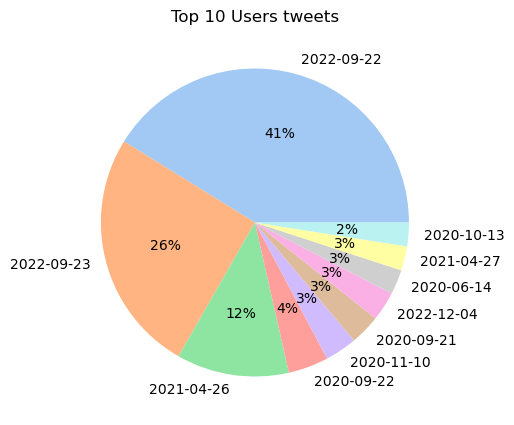

In [77]:
plt.figure(figsize=(8, 5))
colors = sns.color_palette('pastel')
plt.pie(top.values, labels = top.index, colors = colors, autopct='%1.0f%%')
plt.title('Top 10 Users tweets')
plt.show()

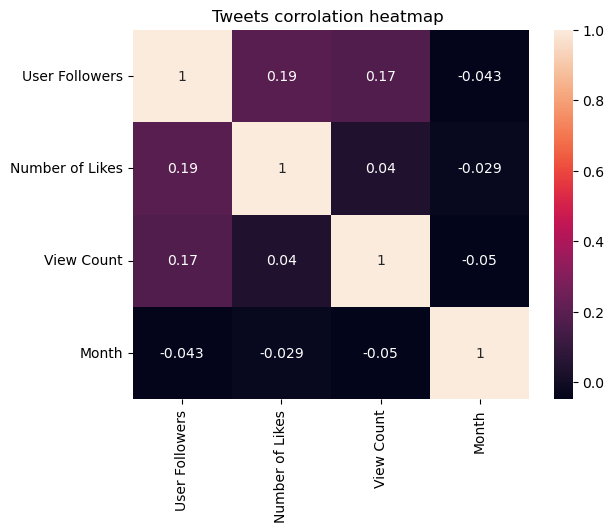

In [78]:
sns.heatmap(tweets_df.corr(),annot=True)
plt.title('Tweets corrolation heatmap ');

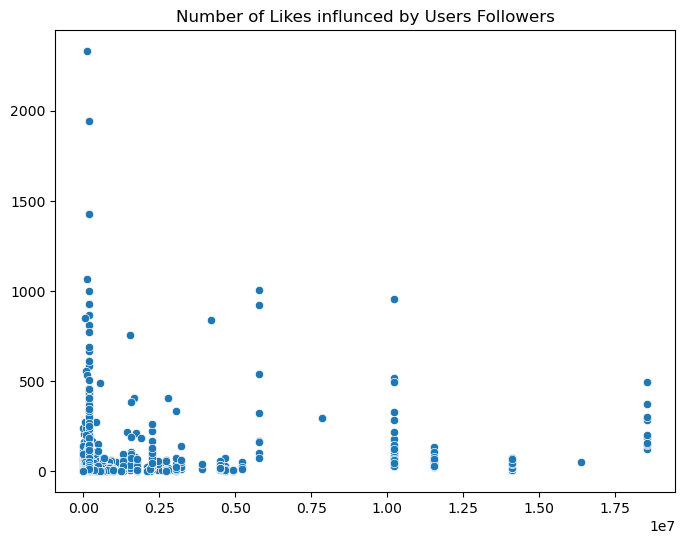

In [79]:
plt.figure(figsize=(8,6))
x = tweets_df['User Followers']
y = tweets_df['Number of Likes']
sns.scatterplot(y=y.values,x=x.values);
plt.title('Number of Likes influnced by Users Followers');

In [62]:
import datetime

In [69]:
tweets_df['Month'] = tweets_df['Date Created'].dt.month 

In [73]:
topm = tweets_df['Month'].value_counts().sort_index()

In [68]:
tweets_df['Date Created'] = pd.to_datetime(tweets_df['Date Created'])

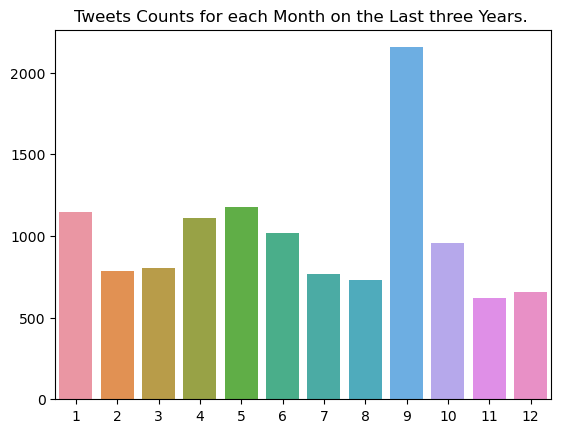

In [80]:
sns.barplot(y=topm.values,x=topm.index)
plt.title('Tweets Counts for each Month on the Last three Years. ');